# Step1: Load Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Load data from SpaceX API
url = 'https://api.spacexdata.com/v4/launches'
response = requests.get(url)
data = response.json()
df = pd.json_normalize(data)
df = df[['success', 'payloads', 'date_utc', 'rocket']].dropna()
df.head()

,success,payloads,date_utc,rocket
0,False,[5eb0e4b5b6c3bb0006eeb1e1],2006-03-24T22:30:00.000Z,5e9d0d95eda69955f709d1eb
1,False,[5eb0e4b6b6c3bb0006eeb1e2],2007-03-21T01:10:00.000Z,5e9d0d95eda69955f709d1eb
2,False,"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006e...",2008-08-03T03:34:00.000Z,5e9d0d95eda69955f709d1eb
3,True,[5eb0e4b7b6c3bb0006eeb1e5],2008-09-28T23:15:00.000Z,5e9d0d95eda69955f709d1eb
4,True,[5eb0e4b7b6c3bb0006eeb1e6],2009-07-13T03:35:00.000Z,5e9d0d95eda69955f709d1eb


# Step2: Feature Engineering

In [13]:
# Simulate payload mass for illustration since it's not directly provided
np.random.seed(42)
df['payload_mass_kg'] = np.random.normal(loc=5000, scale=1500, size=len(df))
df['success'] = df['success'].astype(int)
df = df[['payload_mass_kg', 'success']]
df.head()

,payload_mass_kg,success
0,5745.071230,0
1,4792.603548,0
2,5971.532807,0
3,7284.544785,1
4,4648.769938,1


# Step3: Split Data into Training data and Testing Data

In [14]:
from sklearn.model_selection import train_test_split

X = df[['payload_mass_kg']]
y = df['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step:4 Model Selection

In [15]:
from sklearn.linear_model import LinearRegression

# Select Linear Regression model
model = LinearRegression()

# Step:5 Model Training

In [16]:
# Train the model using training data
model.fit(X_train, y_train)

LinearRegression()

# Step6: Prediction on Training Data

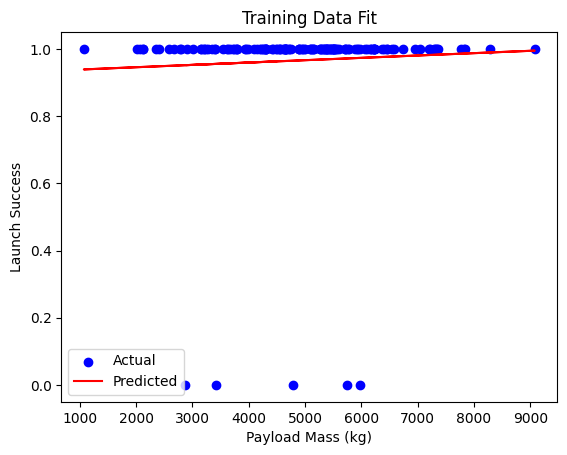

In [17]:
y_train_pred = model.predict(X_train)
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, y_train_pred, color='red', label='Predicted')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Success')
plt.title('Training Data Fit')
plt.legend()
plt.show()

# Step7: Prediction on Test  Data 

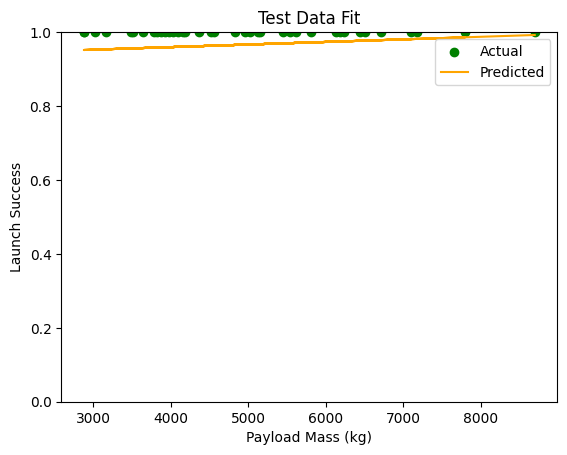

In [18]:
y_test_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='green', label='Actual')
plt.plot(X_test, y_test_pred, color='orange', label='Predicted')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Success')
plt.title('Test Data Fit')
plt.legend()
plt.show()

# Step8: Calculating Accuracy

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'Mean Squared Error: {mean_squared_error(y_test, y_test_pred):.4f}')
print(f'R² Score: {r2_score(y_test, y_test_pred)}')

Mean Squared Error: 0.0012
R² Score: 0.0
